In [745]:
# import libraries

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # For scaling
from io import StringIO  # For reading string data as file

Review these two datasets and brainstorm problems that could be addressed with the dataset.

In [746]:
# get the datasets and explore properties

college_df = pd.read_csv('/workspaces/ml_lab_week_3/data/cc_institution_details.csv')
job_df = pd.read_csv('/workspaces/ml_lab_week_3/data/Placement_Data_Full_Class.csv')

In [747]:
college_df.info()
college_df.head()

<class 'pandas.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   str    
 3   city                                  3798 non-null   str    
 4   state                                 3798 non-null   str    
 5   level                                 3798 non-null   str    
 6   control                               3798 non-null   str    
 7   basic                                 3798 non-null   str    
 8   hbcu                                  94 non-null     str    
 9   flagship                              50 non-null     str    
 10  long_x                                3798 non-null   float64
 11  lat_y                       

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,lat_y,site,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,ft_pct,fte_value,fte_percentile,med_sat_value,med_sat_percentile,aid_value,aid_percentile,endow_value,endow_percentile,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,ft_fac_value,ft_fac_percentile,vsa_year,vsa_grad_after4_first,vsa_grad_elsewhere_after4_first,vsa_enroll_after4_first,vsa_enroll_elsewhere_after4_first,vsa_grad_after6_first,vsa_grad_elsewhere_after6_first,vsa_enroll_after6_first,vsa_enroll_elsewhere_after6_first,vsa_grad_after4_transfer,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,34.783368,www.aamu.edu/,4051,14.2,18.8,21.5,105331,75743,66436,90,93.8,3906,33,823.0,0.0,7142.0,72.0,NaN,NaN,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,82.8,89.0,2010.0,14.7,2.0,36.5,16.1,33.0,5.3,12.5,14.6,15.7,1.5,40.9,17.2,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,33.502230,www.uab.edu,11502,20.9,18.8,21.5,136546,75743,66436,97,72.7,10032,67,1146.0,84.0,6088.0,50.0,24136.0,93.0,29.4,67.0,53.5,66.0,35.1,39.0,80.2,70.0,92.4,98.0,2011.0,22.3,2.9,34.2,19.2,42.6,10.5,7.9,13.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,32.362609,www.amridgeuniversity.edu,322,29.9,17.8,22.5,58414,92268,101725,30,62.7,294,12,NaN,NaN,2540.0,1.0,302.0,1.0,0.0,0.0,66.7,72.0,68.4,91.0,37.5,2.0,67.2,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.638420,34.722818,www.uah.edu,5696,20.9,18.8,21.5,64418,75743,66436,61,74.4,5000,40,1180.0,89.0,6647.0,63.0,11502.0,81.0,16.5,34.0,48.4,54.0,32.8,32.0,81.0,72.0,65.5,56.0,2010.0,12.8,4.7,42.8,18.3,43.0,14.5,10.2,11.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.295677,32.364317,www.alasu.edu/email/index.aspx,5356,11.6,18.8,21.5,132407,75743,66436,96,91.0,5035,41,830.0,1.0,7256.0,74.0,13202.0,84.0,8.8,11.0,25.2,9.0,82.7,100.0,62.2,15.0,67.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


Questions about this dataset: What is the target variable? (A: aid_percentile) Prediction problem: Classification or Regression?
(A: classification)

Independent Business Metric: Assuming that higher aid_percentile results in higher graduation rates, can we predict which institutions will have the highest graduation rates?

In [748]:
job_df.info()
job_df.head()

<class 'pandas.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    str    
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    str    
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    str    
 6   hsc_s           215 non-null    str    
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    str    
 9   workex          215 non-null    str    
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    str    
 12  mba_p           215 non-null    float64
 13  status          215 non-null    str    
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), str(8)
memory usage: 25.3 KB


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Questions about this dataset: What is the target variable? (A: etest_p) Prediction problem: Classification or Regression?
(A: classification)

Independent Business Metric: Assuming that higher etest_p results in higher true employability, can we predict which students will have the highest true employability?

Work through the steps outlined in the examples to prepare the data.

In [749]:
# Address columns where 98~99% of the rows have NaNs
college_df['hbcu'] = college_df['hbcu'].fillna('False')
college_df['flagship'] = college_df['flagship'].fillna('False')
college_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   str    
 3   city                                  3798 non-null   str    
 4   state                                 3798 non-null   str    
 5   level                                 3798 non-null   str    
 6   control                               3798 non-null   str    
 7   basic                                 3798 non-null   str    
 8   hbcu                                  3798 non-null   str    
 9   flagship                              3798 non-null   str    
 10  long_x                                3798 non-null   float64
 11  lat_y                       

In [750]:
# Convert categorical columns to the 'category' data type
cols = ["level", "control", "basic", "hbcu", "flagship"]
college_df[cols] = college_df[cols].astype("category")
college_df.dtypes

index                int64
unitid               int64
chronname              str
city                   str
state                  str
                    ...   
state_sector_ct      int64
carnegie_ct          int64
counted_pct            str
nicknames              str
cohort_size        float64
Length: 63, dtype: object

In [751]:
college_df

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,long_x,lat_y,site,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,exp_award_natl_value,exp_award_percentile,ft_pct,fte_value,fte_percentile,med_sat_value,med_sat_percentile,aid_value,aid_percentile,endow_value,endow_percentile,grad_100_value,grad_100_percentile,grad_150_value,grad_150_percentile,pell_value,pell_percentile,retain_value,retain_percentile,ft_fac_value,ft_fac_percentile,vsa_year,vsa_grad_after4_first,vsa_grad_elsewhere_after4_first,vsa_enroll_after4_first,vsa_enroll_elsewhere_after4_first,vsa_grad_after6_first,vsa_grad_elsewhere_after6_first,vsa_enroll_after6_first,vsa_enroll_elsewhere_after6_first,vsa_grad_after4_transfer,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,False,-86.568502,34.783368,www.aamu.edu/,4051,14.2,18.8,21.5,105331,75743,66436,90,93.8,3906,33,823.0,0.0,7142.0,72.0,NaN,NaN,10.0,15.0,29.1,14.0,71.2,98.0,63.1,17.0,82.8,89.0,2010.0,14.7,2.0,36.5,16.1,33.0,5.3,12.5,14.6,15.7,1.5,40.9,17.2,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,False,False,-86.809170,33.502230,www.uab.edu,11502,20.9,18.8,21.5,136546,75743,66436,97,72.7,10032,67,1146.0,84.0,6088.0,50.0,24136.0,93.0,29.4,67.0,53.5,66.0,35.1,39.0,80.2,70.0,92.4,98.0,2011.0,22.3,2.9,34.2,19.2,42.6,10.5,7.9,13.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,False,False,-86.174010,32.362609,www.amridgeuniversity.edu,322,29.9,17.8,22.5,58414,92268,101725,30,62.7,294,12,NaN,NaN,2540.0,1.0,302.0,1.0,0.0,0.0,66.7,72.0,68.4,91.0,37.5,2.0,67.2,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,False,False,-86.638420,34.722818,www.uah.edu,5696,20.9,18.8,21.5,64418,75743,66436,61,74.4,5000,40,1180.0,89.0,6647.0,63.0,11502.0,81.0,16.5,34.0,48.4,54.0,32.8,32.0,81.0,72.0,65.5,56.0,2010.0,12.8,4.7,42.8,18.3,43.0,14.5,10.2,11.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,False,-86.295677,32.364317,www.alasu.edu/email/index.aspx,5356,11.6,18.8,21.5,132407,75743,66436,96,91.0,5035,41,830.0,1.0,7256.0,74.0,13202.0,84.0,8.8,11.0,25.2,9.0,82.7,100.0,62.2,15.0,67.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,3793,461528,Grace College of Divinity,Fayetteville,North Carolina,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,False,False,-78.961691,35.058770,www.gcd.edu,110,26.2,21.4,22.5,24047,148420,101725,3,34.5,68,1,NaN,NaN,4860.0,8.0,NaN,NaN,0.0,0.0,0.0,0.0,26.3,26.0,33.3,1.0,10.7,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [752]:
# Convert categorical columns to the 'category' data type
cols = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "status"]
job_df[cols] = job_df[cols].astype("category")
job_df.dtypes

sl_no                int64
gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s             category
degree_p           float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
mba_p              float64
status            category
salary             float64
dtype: object

In [753]:
# For college_df, all categorical variables have less than 5 groups except basic, which must be transformed.

print(college_df.basic.value_counts())
top_programs = ['Associates--Private For-profit', 'Masters Colleges and Universities--larger programs',
                'Baccalaureate Colleges--Diverse Fields', 'Associates--Public Rural-serving Medium']
college_df.basic = (college_df.basic.apply(lambda x: x if x in top_programs
                               else "Other")).astype('category')

basic
Associates--Private For-profit                                                  517
Masters Colleges and Universities--larger programs                              386
Baccalaureate Colleges--Diverse Fields                                          343
Associates--Public Rural-serving Medium                                         289
Baccalaureate Colleges--Arts & Sciences                                         252
Masters Colleges and Universities--medium programs                              169
Associates--Public Rural-serving Large                                          128
Associates--Public Urban-serving Multicampus                                    125
Baccalaureate/Associates Colleges                                               124
Schools of art- music- and design                                               114
Associates--Public Rural-serving Small                                          111
Associates--Public Suburban-serving Single Campus                     

In [754]:
print(college_df.basic.value_counts())

basic
Other                                                 2263
Associates--Private For-profit                         517
Masters Colleges and Universities--larger programs     386
Baccalaureate Colleges--Diverse Fields                 343
Associates--Public Rural-serving Medium                289
Name: count, dtype: int64


In [755]:
# For job_df, all categorical variables have less than 5 groups, so they do not require transformation.

<Axes: ylabel='Density'>

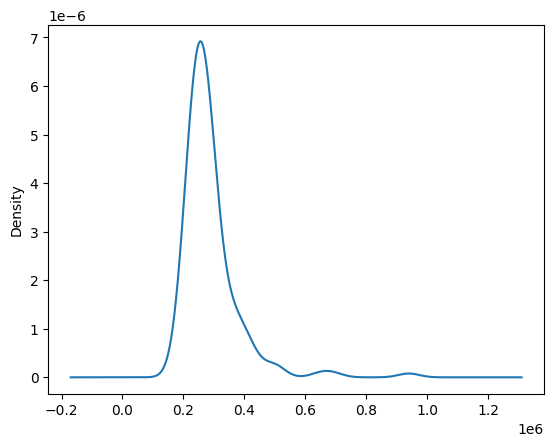

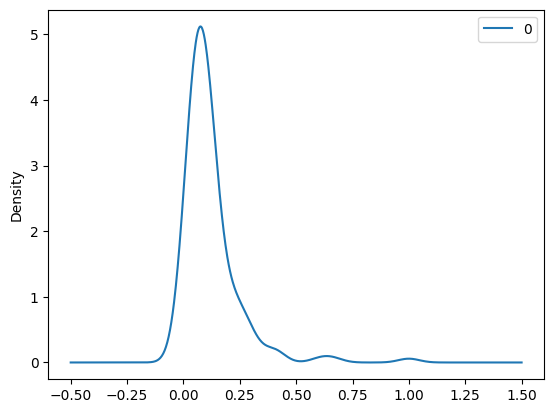

In [756]:
# Check how scaling preserves distribution shape
salary_standardized = MinMaxScaler().fit_transform(job_df[['salary']])
job_df.salary.plot.density()
pd.DataFrame(salary_standardized).plot.density()

In [757]:
# Chose MinMaxScaler since I did not assume normal distribution
numeric_cols = list(college_df.select_dtypes('number'))
college_df[numeric_cols] = MinMaxScaler().fit_transform(college_df[numeric_cols])

In [758]:
# Chose MinMaxScaler since I did not assume normal distribution
numeric_cols = list(job_df.select_dtypes('number'))
job_df[numeric_cols] = MinMaxScaler().fit_transform(job_df[numeric_cols])

In [759]:
# One hot encoding
category_list = list(college_df.select_dtypes('category'))
college_encoded = pd.get_dummies(college_df, columns=category_list)
college_encoded.info()

<class 'pandas.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 72 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     3798 non-null   float64
 1   unitid                                                    3798 non-null   float64
 2   chronname                                                 3798 non-null   str    
 3   city                                                      3798 non-null   str    
 4   state                                                     3798 non-null   str    
 5   long_x                                                    3798 non-null   float64
 6   lat_y                                                     3798 non-null   float64
 7   site                                                      3779 non-null   str    
 8   student_count                

In [760]:
# One hot encoding
category_list = list(job_df.select_dtypes('category'))
job_encoded = pd.get_dummies(job_df, columns=category_list)
job_encoded.info()

<class 'pandas.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sl_no                   215 non-null    float64
 1   ssc_p                   215 non-null    float64
 2   hsc_p                   215 non-null    float64
 3   degree_p                215 non-null    float64
 4   etest_p                 215 non-null    float64
 5   mba_p                   215 non-null    float64
 6   salary                  148 non-null    float64
 7   gender_F                215 non-null    bool   
 8   gender_M                215 non-null    bool   
 9   ssc_b_Central           215 non-null    bool   
 10  ssc_b_Others            215 non-null    bool   
 11  hsc_b_Central           215 non-null    bool   
 12  hsc_b_Others            215 non-null    bool   
 13  hsc_s_Arts              215 non-null    bool   
 14  hsc_s_Commerce          215 non-null    bool   
 15  

Axes(0.125,0.11;0.775x0.77)
count    3797.000000
mean        0.499910
std         0.289227
min         0.000000
25%         0.250000
50%         0.500000
75%         0.750000
max         1.000000
Name: aid_percentile, dtype: float64


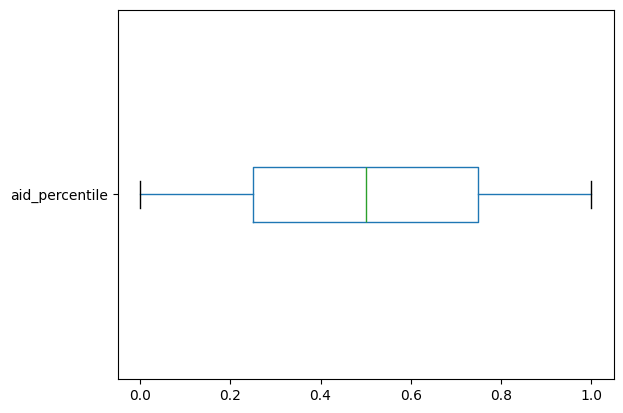

In [761]:
# Calculate the baseline/prevalence for college_encoded
print(college_encoded.boxplot(column='aid_percentile', vert=False, grid=False))
print(college_encoded.aid_percentile.describe())

In [762]:
college_encoded['aid_percentile_f'] = pd.cut(college_encoded.aid_percentile,
                                    bins=[-1, 0.75, 1],
                                    labels=[0, 1])
college_encoded.info()

<class 'pandas.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 73 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   index                                                     3798 non-null   float64 
 1   unitid                                                    3798 non-null   float64 
 2   chronname                                                 3798 non-null   str     
 3   city                                                      3798 non-null   str     
 4   state                                                     3798 non-null   str     
 5   long_x                                                    3798 non-null   float64 
 6   lat_y                                                     3798 non-null   float64 
 7   site                                                      3779 non-null   str     
 8   student_count      

In [763]:
prevalence = (college_encoded.aid_percentile_f.value_counts()[1] /
              len(college_encoded.aid_percentile_f))
print(f"Baseline/Prevalence: {prevalence:.2%}")

# Double-check our calculation
print(college_encoded.aid_percentile_f.value_counts())
print(f"Manual calculation: 931/(931+2866) = {931/(931+2866):.4f}")

Baseline/Prevalence: 24.51%
aid_percentile_f
0    2866
1     931
Name: count, dtype: int64
Manual calculation: 931/(931+2866) = 0.2452


Axes(0.125,0.11;0.775x0.77)
count    215.000000
mean       0.460428
std        0.276582
min        0.000000
25%        0.208333
50%        0.437500
75%        0.697917
max        1.000000
Name: etest_p, dtype: float64


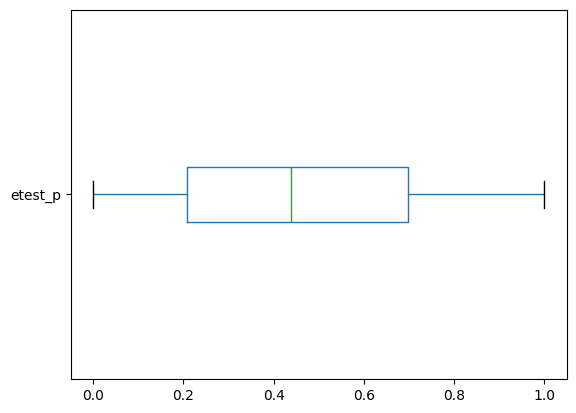

In [764]:
# Calculate the baseline/prevalence for job_encoded
print(job_encoded.boxplot(column='etest_p', vert=False, grid=False))
print(job_encoded.etest_p.describe())

In [765]:
job_encoded['etest_p_f'] = pd.cut(job_encoded.etest_p,
                                    bins=[-1, 0.70, 1],
                                    labels=[0, 1])
job_encoded.info()

<class 'pandas.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   sl_no                   215 non-null    float64 
 1   ssc_p                   215 non-null    float64 
 2   hsc_p                   215 non-null    float64 
 3   degree_p                215 non-null    float64 
 4   etest_p                 215 non-null    float64 
 5   mba_p                   215 non-null    float64 
 6   salary                  148 non-null    float64 
 7   gender_F                215 non-null    bool    
 8   gender_M                215 non-null    bool    
 9   ssc_b_Central           215 non-null    bool    
 10  ssc_b_Others            215 non-null    bool    
 11  hsc_b_Central           215 non-null    bool    
 12  hsc_b_Others            215 non-null    bool    
 13  hsc_s_Arts              215 non-null    bool    
 14  hsc_s_Commerce          215 non-null 

In [766]:
prevalence = (job_encoded.etest_p_f.value_counts()[1] /
              len(job_encoded.etest_p_f))
print(f"Baseline/Prevalence: {prevalence:.2%}")

# Double-check our calculation
print(job_encoded.etest_p_f.value_counts())
print(f"Manual calculation: 105/(105+110) = {54/(54+161):.4f}")

Baseline/Prevalence: 25.12%
etest_p_f
0    161
1     54
Name: count, dtype: int64
Manual calculation: 105/(105+110) = 0.2512


In [767]:
# Clean dataset before splitting
college_clean = college_encoded.drop(['index', 'unitid', 'chronname', 'city', 'state', 'long_x', 'lat_y', 'site', 'nicknames', 'aid_percentile'], axis=1)
print(college_clean)

      student_count  awards_per_value  awards_per_state_value  \
0          0.023677          0.099927                0.275132   
1          0.067476          0.148796                0.275132   
2          0.001758          0.214442                0.257496   
3          0.033347          0.148796                0.275132   
4          0.031348          0.080963                0.275132   
...             ...               ...                     ...   
3793       0.000511          0.187454                0.320988   
3794       0.000688          0.117433                0.338624   
3795       0.002733          0.398249                0.507937   
3796       0.000729          0.235594                0.613757   
3797       0.000711          0.157549                0.289242   

      awards_per_natl_value  exp_award_value  exp_award_state_value  \
0                  0.306748         0.019941               0.359141   
1                  0.306748         0.025851               0.359141   
2     

In [768]:
# Clean dataset before splitting
job_clean = job_encoded.drop(['sl_no', 'etest_p'], axis=1)
print(job_clean)

        ssc_p     hsc_p  degree_p     mba_p    salary  gender_F  gender_M  \
0    0.538240  0.889621  0.195122  0.284483  0.094595     False      True   
1    0.792414  0.680890  0.670244  0.564843  0.000000     False      True   
2    0.497011  0.510708  0.341463  0.247001  0.067568     False      True   
3    0.311482  0.247117  0.048780  0.308096       NaN     False      True   
4    0.925788  0.602965  0.568293  0.160795  0.304054     False      True   
..        ...       ...       ...       ...       ...       ...       ...   
210  0.818594  0.741351  0.673171  0.872564  0.270270     False      True   
211  0.352711  0.378913  0.536585  0.090330  0.101351     False      True   
212  0.538240  0.494234  0.560976  0.693778  0.128378     False      True   
213  0.682540  0.477759  0.195122  0.338081  0.005405      True     False   
214  0.435168  0.345964  0.073171  0.337706       NaN     False      True   

     ssc_b_Central  ssc_b_Others  hsc_b_Central  hsc_b_Others  hsc_s_Arts  

In [ ]:
# Split the data

college_clean = college_clean.dropna() # must do this since the code below will not run with NaNs

train, test = train_test_split(
    college_clean,
    train_size=5/7,
    stratify=college_clean.aid_percentile_f
)
print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

Training set shape: (170, 63)
Test set shape: (68, 63)


In [770]:
tune, test = train_test_split(
    test,
    train_size=.5,
    stratify=test.aid_percentile_f
)

In [771]:
# Verify prevalences

print("Training set class distribution:")
print(train.aid_percentile_f.value_counts())
print(f"Training prevalence: {56/(56+114):.2%}")

print("\nTuning set class distribution:")
print(tune.aid_percentile_f.value_counts())
print(f"Tuning prevalence: {11/(11+23):.2%}")

print("\nTest set class distribution:")
print(test.aid_percentile_f.value_counts())
print(f"Test prevalence: {12/(12+22):.2%}")

Training set class distribution:
aid_percentile_f
0    114
1     56
Name: count, dtype: int64
Training prevalence: 32.94%

Tuning set class distribution:
aid_percentile_f
0    23
1    11
Name: count, dtype: int64
Tuning prevalence: 32.35%

Test set class distribution:
aid_percentile_f
0    22
1    12
Name: count, dtype: int64
Test prevalence: 35.29%


In [772]:
# Split the data

job_clean["has_salary"] = job_clean["salary"].notna().astype(int) # add 1 to has_salary if salary is not NaN; add 0 if salary is NaN
job_clean["salary"] = job_clean["salary"].fillna(0)  # fill the NaNs in salary with 0s

train, test = train_test_split(
    job_clean,
    train_size=5/7,
    stratify=job_clean.etest_p_f
)
print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

Training set shape: (153, 25)
Test set shape: (62, 25)


In [773]:
tune, test = train_test_split(
    test,
    train_size=.5,
    stratify=test.etest_p_f
)

In [774]:
# Verify prevalences

print("Training set class distribution:")
print(train.etest_p_f.value_counts())
print(f"Training prevalence: {38/(38+115):.2%}")

print("\nTuning set class distribution:")
print(tune.etest_p_f.value_counts())
print(f"Tuning prevalence: {8/(8+23):.2%}")

print("\nTest set class distribution:")
print(test.etest_p_f.value_counts())
print(f"Test prevalence: {8/(8+23):.2%}")

Training set class distribution:
etest_p_f
0    115
1     38
Name: count, dtype: int64
Training prevalence: 24.84%

Tuning set class distribution:
etest_p_f
0    23
1     8
Name: count, dtype: int64
Tuning prevalence: 25.81%

Test set class distribution:
etest_p_f
0    23
1     8
Name: count, dtype: int64
Test prevalence: 25.81%


Question: What do your instincts tell you about the data? Can it address your problem? What areas/items are you worried about?

My instincts tell me that the final cleaned datasets before I split them are definitely not perfect and there are probably many ways where I could have handled some issues better. I believe that it can address my problems somewhat, although likely not optimally. I am especially worried about how I had to drop so many rows with the college dataset because I wasn't sure of how to deal with so many NaNs in so many columns.